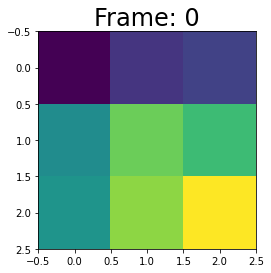

In [6]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from itertools import cycle

## Generate some data
randomdata = np.random.random(size=(5,3,3))
harvest_cycle = cycle([i for i in randomdata])
harvest = next(harvest_cycle)

## Initialize figure
fig,ax = plt.subplots(figsize=[4,4])
ax.set_aspect('equal')
ax.grid(which = 'minor',color='w', linestyle='-', linewidth=2)
heatmap = ax.imshow(harvest)

## Animate 
def update(frame_number):
    ## Clears the data passed to the axes
    ##  This is important so the final figure does not store
    ##  every single frame and slows everything down 
    ax.cla()

    ax.imshow(next(harvest_cycle))
    ax.set_title(f"Frame: {frame_number}",fontsize=24)

animation = FuncAnimation(fig,update,frames=3)

## Saved mp4 video
# animation.save("movie.mp4")

## Keep jshmtl representation
animjs = animation.to_jshtml()

with open("animated.html","w") as f:
    f.write(animjs)

In [8]:
import re
inject = """document.querySelector('.anim-buttons button[title="Play"]').click();"""

p = re.compile(r"(setTimeout.*?;)(.*?})", re.MULTILINE | re.DOTALL)

newanimjs = p.sub(rf"\1 \n {inject} \2", animjs)

with open("animated.html","w") as f:
    f.write(newanimjs)
